In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 5.8 MB/s eta 0:00:00


Mounted at /content/gdrive/


<Figure size 2000x2000 with 0 Axes>

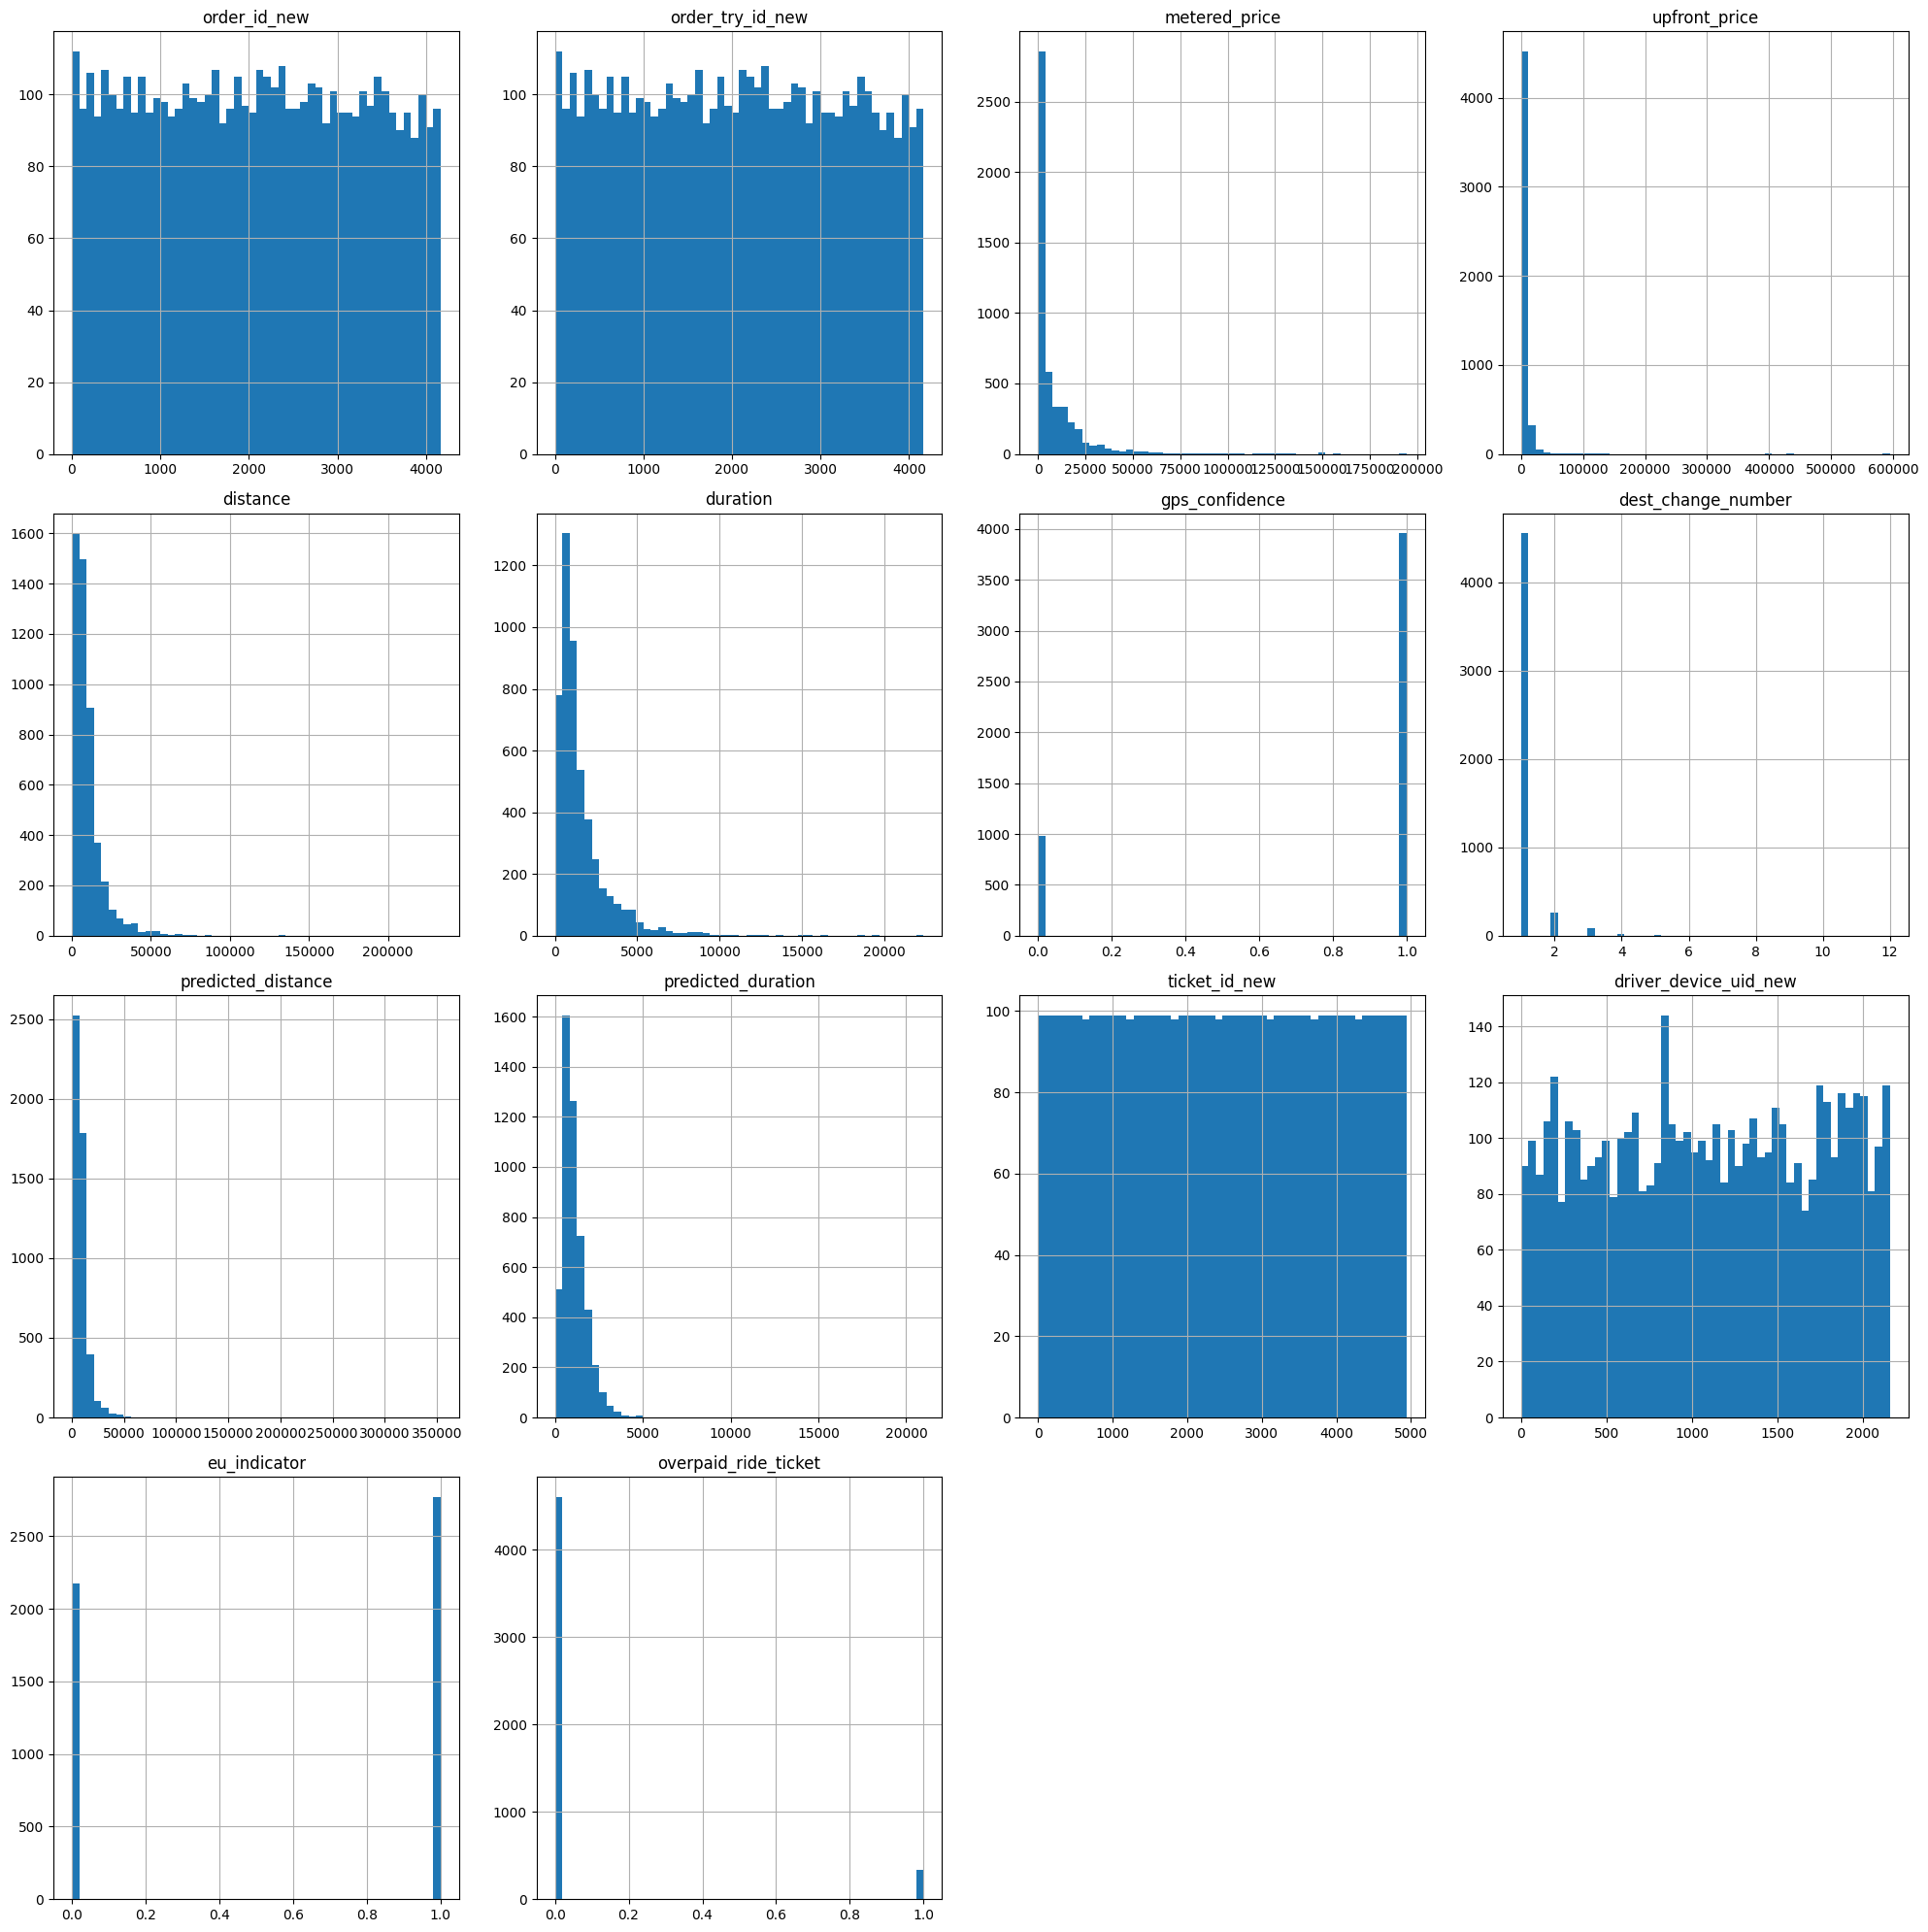

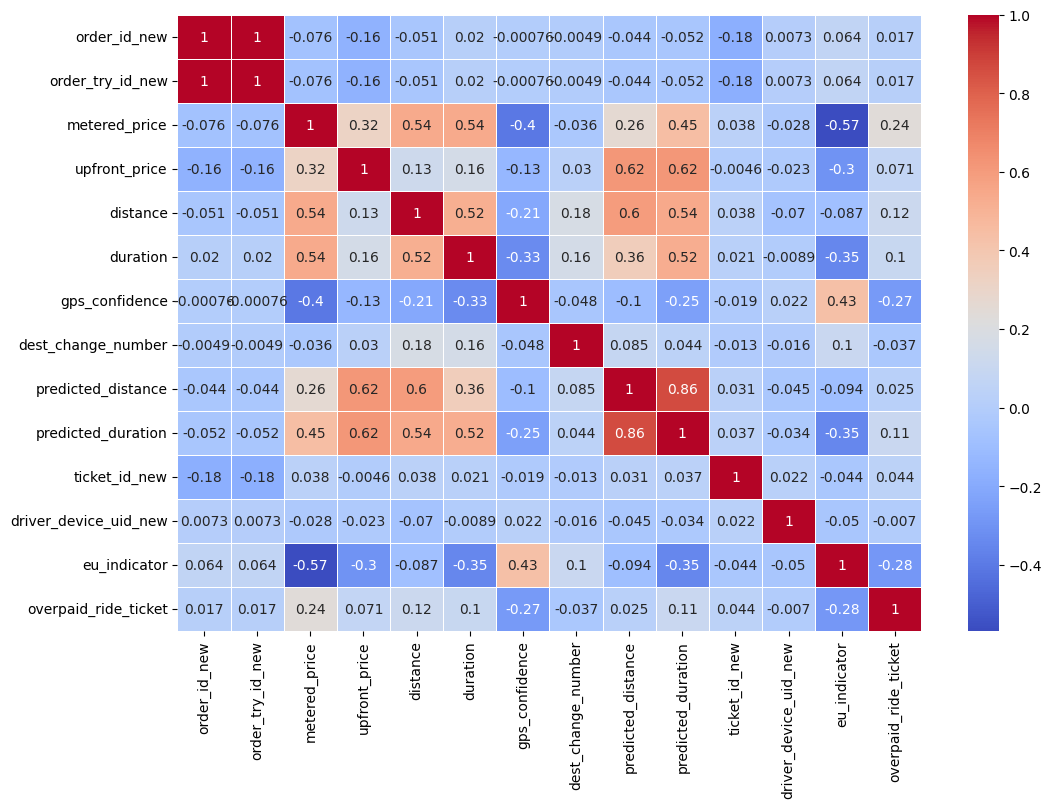

MAE: 347.0772552044359


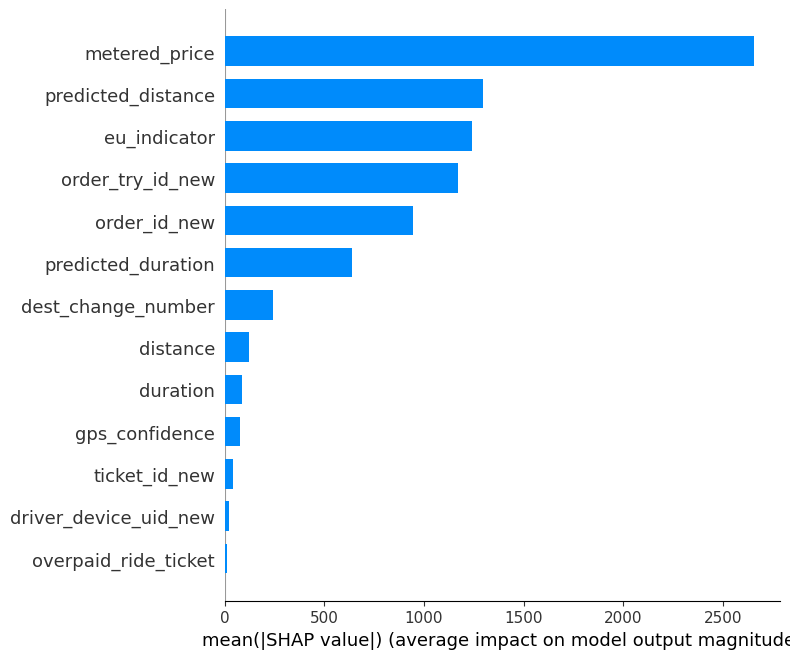

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import shap

# Mount Google Drive and Load the Dataset
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/BBBOOOLLLTTT/test.csv')

# Initial Cleanup
threshold = 0.5 * len(df)
df_cleaned = df.dropna(thresh=threshold, axis=1)
columns_to_drop = ['device_token', 'session_token']
df_cleaned = df_cleaned.drop(columns=columns_to_drop, errors='ignore')

# Dropping non-numeric columns
df_cleaned = df_cleaned.select_dtypes(include=[np.number])

# Replacing infinite values with NaN
df_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute NaN values (e.g., with mean imputation)
imputer = SimpleImputer(strategy='mean')
df_cleaned_imputed = pd.DataFrame(imputer.fit_transform(df_cleaned), columns=df_cleaned.columns)

# Histogram Visualization
plt.figure(figsize=(20, 20))
df_cleaned_imputed.hist(bins=50, figsize=(20, 20))
plt.tight_layout()
plt.show()

# Correlation Heatmap
corr_matrix = df_cleaned_imputed.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

# Model Building

# Selecting features and target
features = df_cleaned_imputed.columns.tolist()
features.remove('upfront_price')  # Assuming upfront_price is the target variable
X = df_cleaned_imputed[features]
y = df_cleaned_imputed['upfront_price']

# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluating the model
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f'MAE: {mae}')

# Model Interpretation
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")


##############


Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


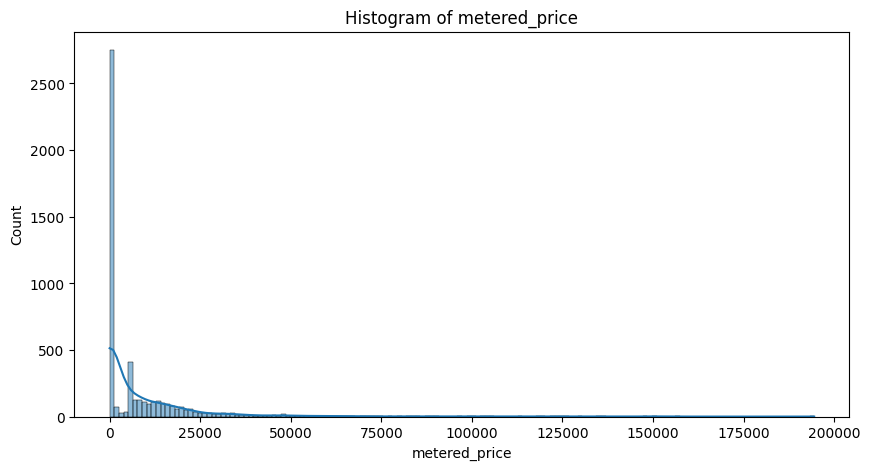

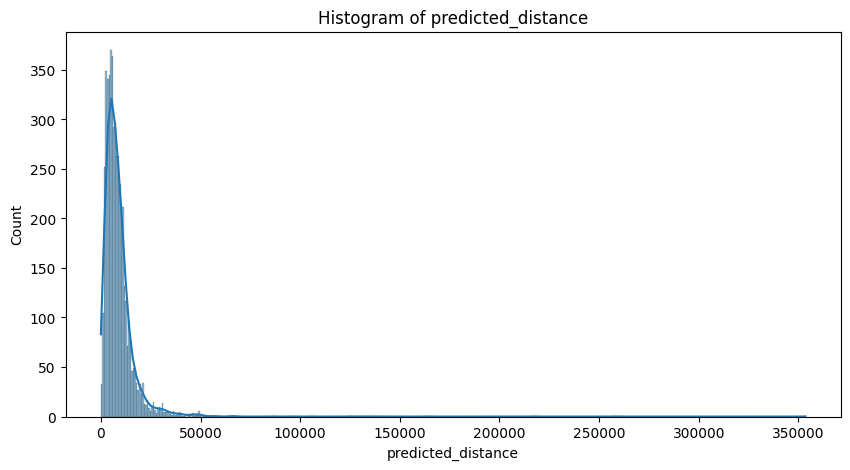

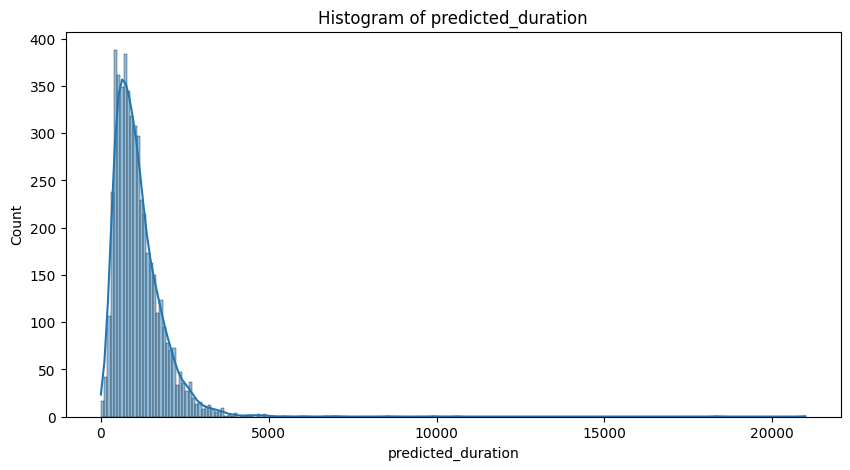

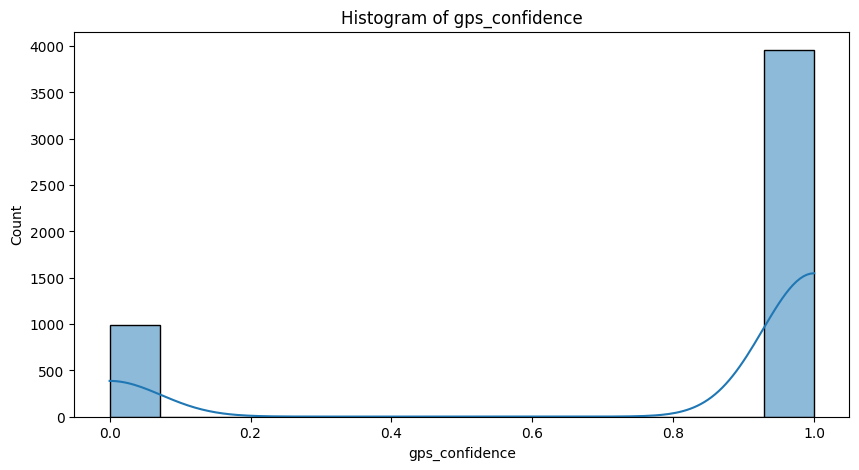

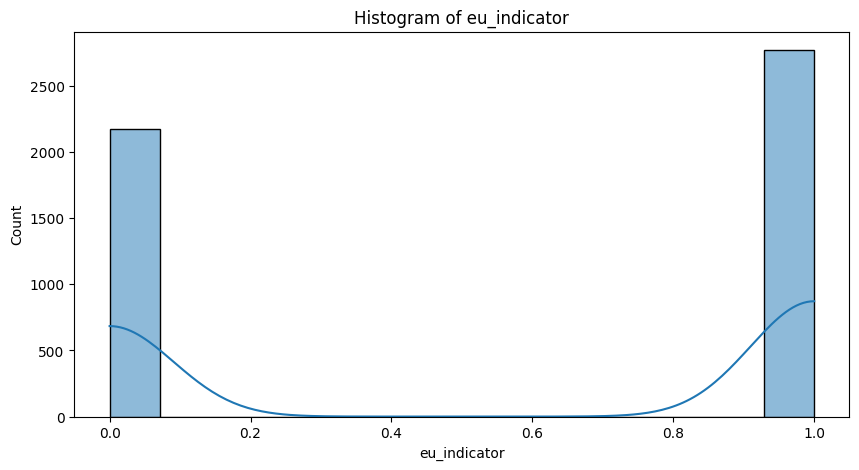

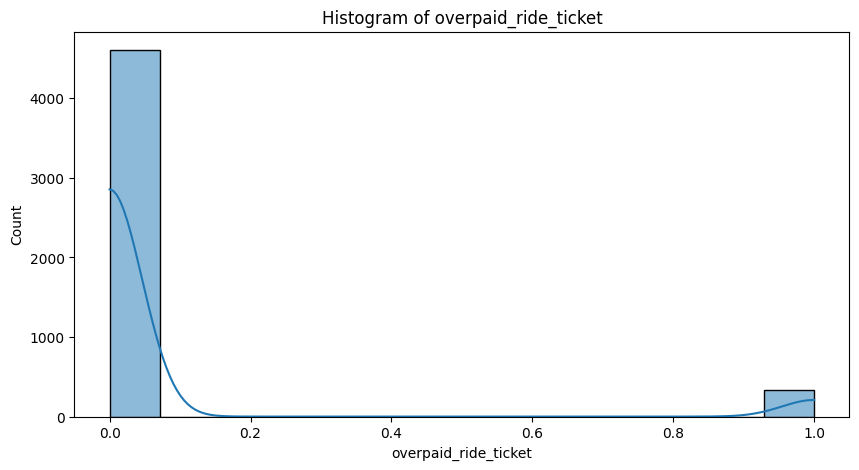

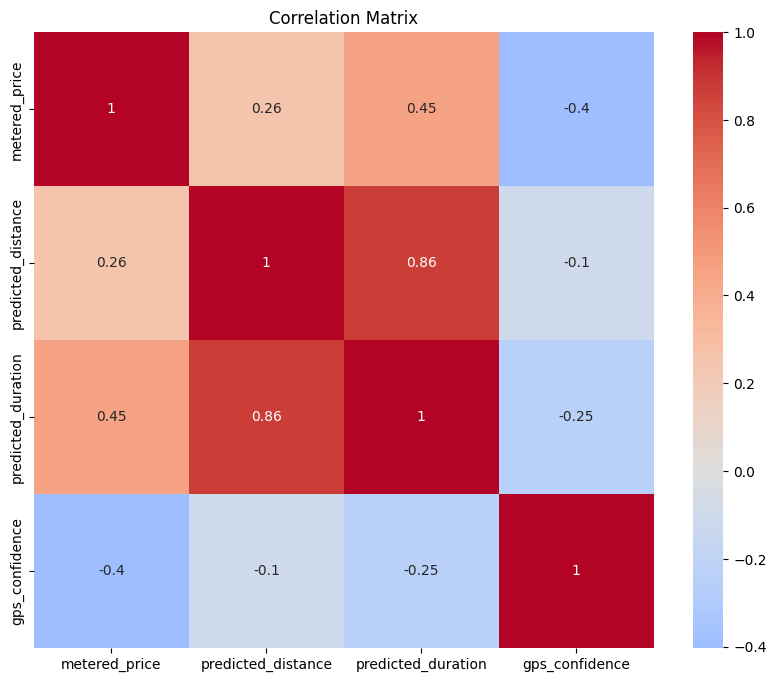

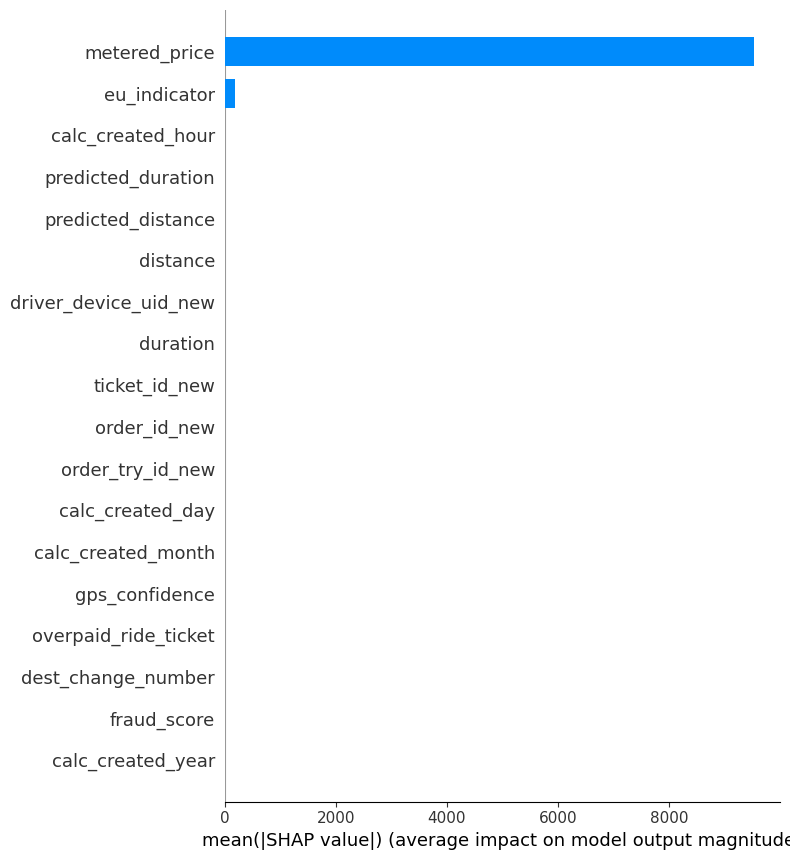

Mean Absolute Error (MAE) for the model: 21.35


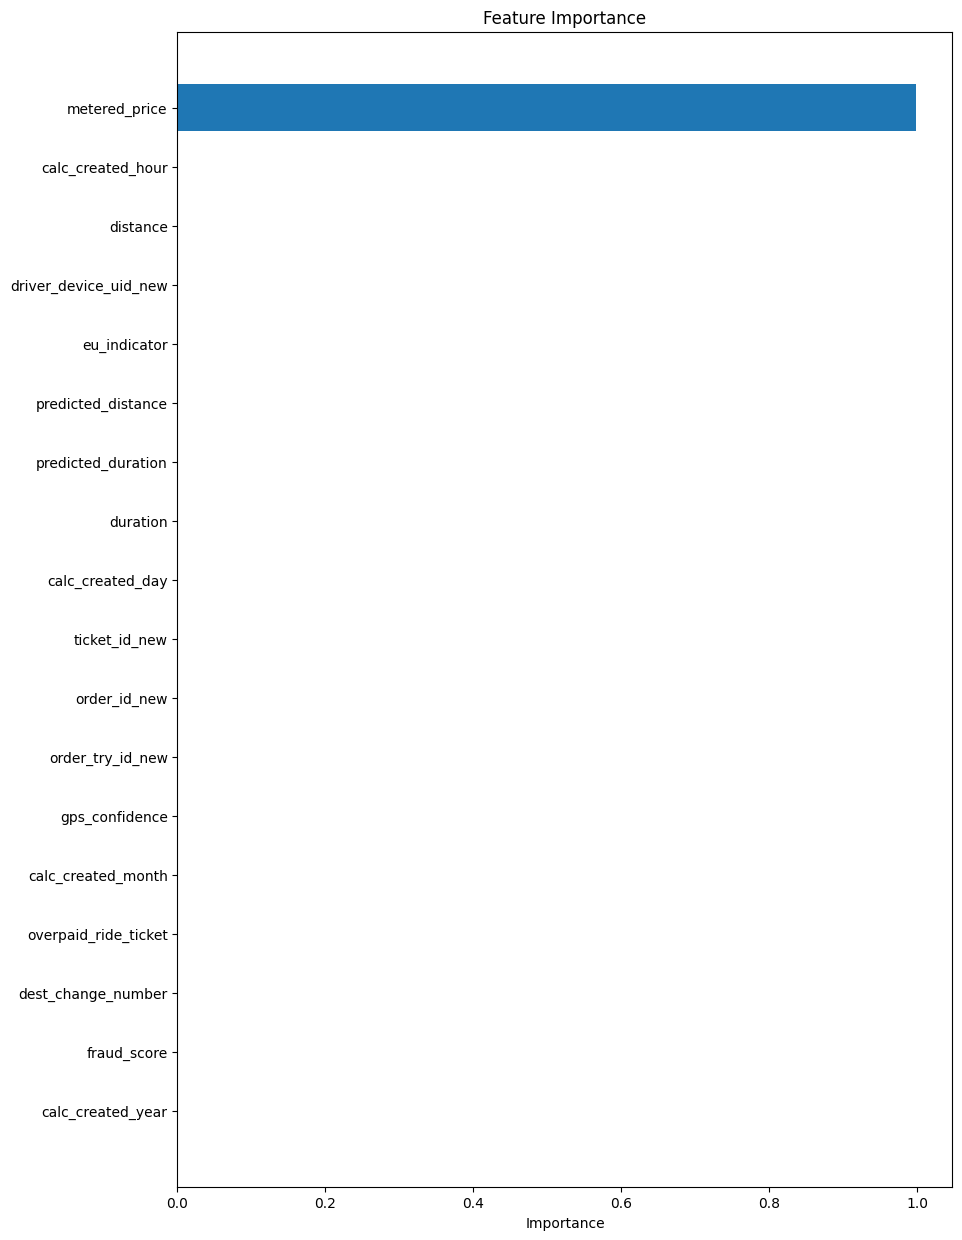

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import shap

from google.colab import drive
drive.mount('/content/gdrive/')
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/BBBOOOLLLTTT/test.csv')

df = df.drop(columns=['device_token'])

object_cols = df.select_dtypes(include='object').columns.tolist()
for col in object_cols:
    try:
        df[col] = pd.to_datetime(df[col])
        df[col + '_year'] = df[col].dt.year
        df[col + '_month'] = df[col].dt.month
        df[col + '_day'] = df[col].dt.day
        df[col + '_hour'] = df[col].dt.hour
        df = df.drop(columns=[col])
    except:
        df = df.drop(columns=[col])

df.replace([np.inf, -np.inf], np.nan, inplace=True)
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Visualizations and Analysis
variables = ['metered_price', 'predicted_distance', 'predicted_duration', 'gps_confidence', 'eu_indicator', 'overpaid_ride_ticket']
for var in variables:
    plt.figure(figsize=(10,5))
    sns.histplot(df[var], kde=True)
    plt.title(f'Histogram of {var}')
    plt.show()

correlation_matrix = df[['metered_price', 'predicted_distance', 'predicted_duration', 'gps_confidence']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

features = df.columns.tolist()
if 'upfront_price' in features:
    features.remove('upfront_price')
X = df[features]
y = df['metered_price'] if 'metered_price' in df.columns else df['upfront_price']

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE) for the model: {mae:.2f}')

feature_importances = model.feature_importances_
sorted_idx = np.argsort(feature_importances)
plt.figure(figsize=(10, 15))
plt.barh(range(X.shape[1]), feature_importances[sorted_idx], align='center')
plt.yticks(range(X.shape[1]), X.columns[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


In [ ]:
print('to')

to


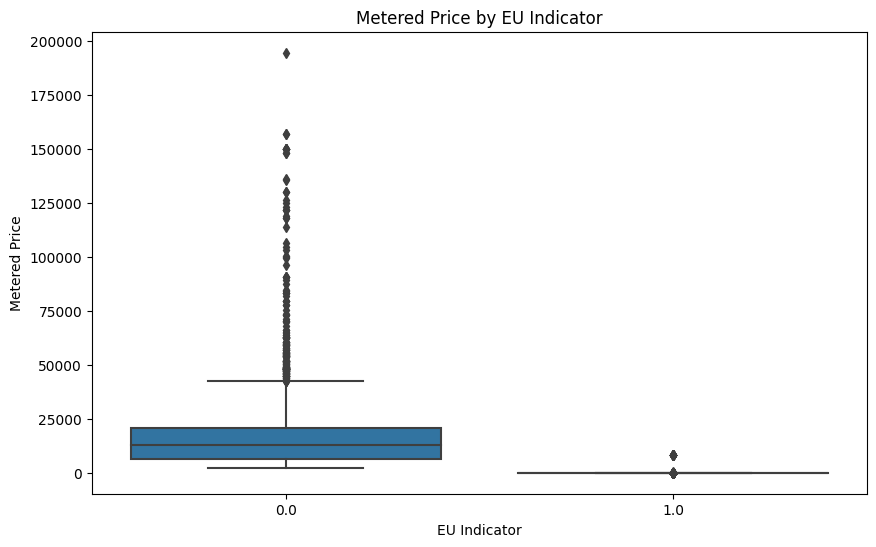

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='eu_indicator', y='metered_price', data=df)
plt.title('Metered Price by EU Indicator')
plt.xlabel('EU Indicator')
plt.ylabel('Metered Price')
plt.show()


In [ ]:
df.head()

,order_id_new,order_try_id_new,metered_price,upfront_price,distance,duration,gps_confidence,dest_change_number,predicted_distance,predicted_duration,ticket_id_new,driver_device_uid_new,eu_indicator,overpaid_ride_ticket,fraud_score,calc_created_year,calc_created_month,calc_created_day,calc_created_hour
0,22.0,22.0,4.04,10.000000,2839.0,700.0,1.0,1.0,13384.0,1091.0,1376.0,1596.0,1.0,0.0,-1383.000000,2020.0,2.0,2.0,3.0
1,618.0,618.0,6.09,3.600000,5698.0,493.0,1.0,1.0,2286.0,360.0,2035.0,1578.0,1.0,0.0,-674.046703,2020.0,2.0,8.0,2.0
2,657.0,657.0,4.32,3.500000,4426.0,695.0,1.0,1.0,4101.0,433.0,2222.0,951.0,1.0,0.0,-166.000000,2020.0,2.0,8.0,11.0
3,313.0,313.0,72871.72,4160.095747,49748.0,1400.0,0.0,2.0,3017.0,600.0,1788.0,1587.0,0.0,1.0,-674.046703,2020.0,2.0,5.0,6.0
4,1176.0,1176.0,20032.50,19500.000000,10273.0,5067.0,1.0,1.0,14236.0,2778.0,2710.0,433.0,0.0,0.0,-674.046703,2020.0,2.0,13.0,17.0


Percentage of rides with >20% price difference: 62.31%
Percentage of rides with >20% price difference by EU Indicator:
eu_indicator
0.0    81.546249
1.0    47.220217
dtype: float64
Mean Squared Error for regression on price difference: 42785458.87
Top 10 time segments with highest % of >20% price difference:
calc_created_month  calc_created_day  calc_created_hour
2.0                 2.0               0.0                  100.0
                    3.0               0.0                  100.0
                                      2.0                  100.0
                                      4.0                  100.0
                                      8.0                  100.0
                                      18.0                 100.0
                                      22.0                 100.0
                    4.0               2.0                  100.0
                                      4.0                  100.0
                                      6.0        

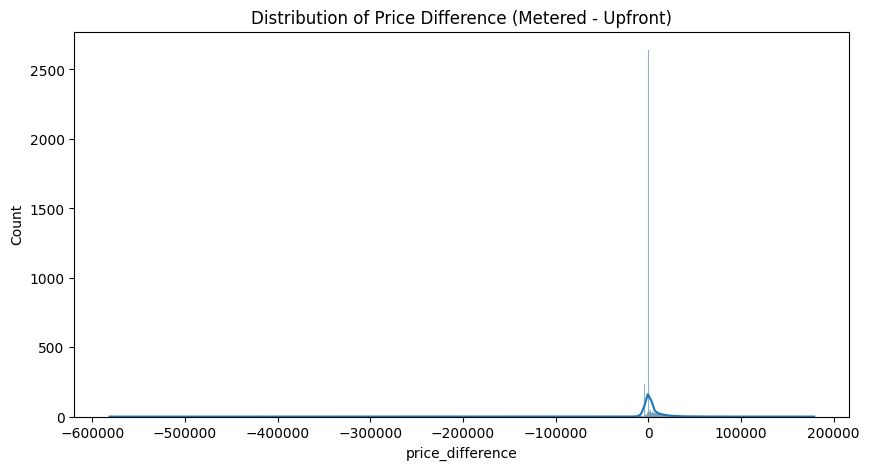

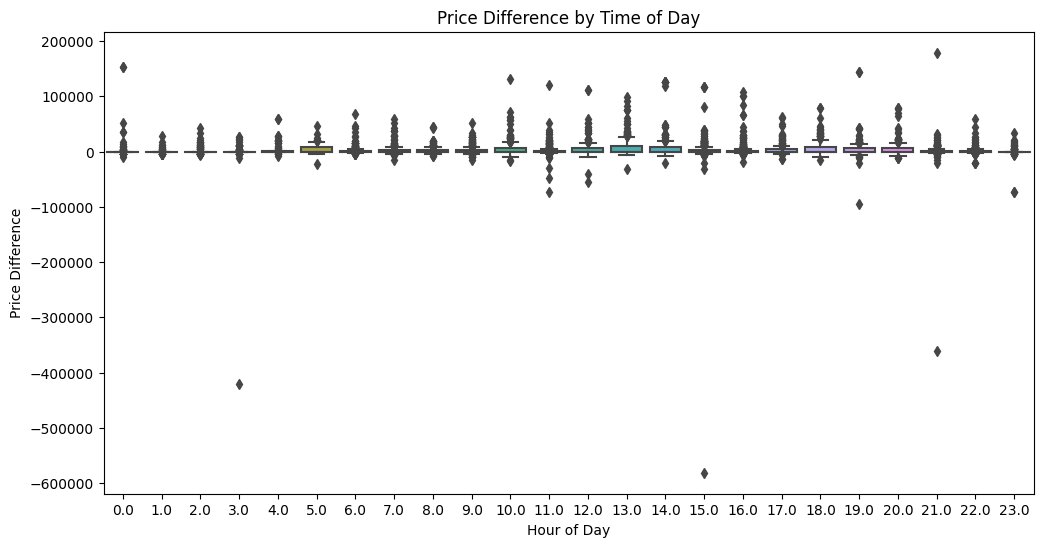

In [ ]:
# Upfront Price vs. Metered Price Analysis
df['price_difference'] = df['metered_price'] - df['upfront_price']
df['price_diff_percent'] = (df['price_difference'] / df['upfront_price']) * 100
df_high_diff = df[df['price_diff_percent'].abs() > 20]

# Percentage of rides where the difference exceeds 20%
percent_high_diff = (len(df_high_diff) / len(df)) * 100
print(f"Percentage of rides with >20% price difference: {percent_high_diff:.2f}%")

# Segment analysis by eu_indicator
eu_diff = df_high_diff.groupby('eu_indicator').size()
eu_diff_percent = (eu_diff / df.groupby('eu_indicator').size()) * 100
print("Percentage of rides with >20% price difference by EU Indicator:")
print(eu_diff_percent)

# Regression Analysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df[features]
y_diff = df['price_difference']

X_train_diff, X_test_diff, y_train_diff, y_test_diff = train_test_split(X, y_diff, test_size=0.2, random_state=42)

reg_model = LinearRegression()
reg_model.fit(X_train_diff, y_train_diff)
y_diff_pred = reg_model.predict(X_test_diff)

mse = mean_squared_error(y_test_diff, y_diff_pred)
print(f'Mean Squared Error for regression on price difference: {mse:.2f}')

# Time-based Analysis
time_diff = df_high_diff.groupby(['calc_created_month', 'calc_created_day', 'calc_created_hour']).size()
time_total = df.groupby(['calc_created_month', 'calc_created_day', 'calc_created_hour']).size()
time_diff_percent = (time_diff / time_total) * 100

print("Top 10 time segments with highest % of >20% price difference:")
print(time_diff_percent.nlargest(10))

# GPS Confidence Analysis
gps_diff_mean = df_high_diff['gps_confidence'].mean()
print(f"Average GPS confidence for rides with >20% price difference: {gps_diff_mean:.2f}")

# Patterns in Overpaid Rides
overpaid_rides = df[df['overpaid_ride_ticket'] == 1]
overpaid_diff_percent = (len(overpaid_rides) / len(df_high_diff)) * 100
print(f"Percentage of high discrepancy rides that are overpaid: {overpaid_diff_percent:.2f}%")


# Fraud Analysis
fraud_high_diff_mean = df_high_diff['fraud_score'].mean()
fraud_overall_mean = df['fraud_score'].mean()

print(f"Average Fraud Score for rides with >20% price difference: {fraud_high_diff_mean:.2f}")
print(f"Overall Average Fraud Score: {fraud_overall_mean:.2f}")

# Dest Change Analysis
dest_changes_diff_mean = df_high_diff['dest_change_number'].mean()
dest_changes_overall_mean = df['dest_change_number'].mean()

print(f"Average Destination Changes for rides with >20% price difference: {dest_changes_diff_mean:.2f}")
print(f"Overall Average Destination Changes: {dest_changes_overall_mean:.2f}")

# Distance and Duration Analysis
distance_diff_mean = df_high_diff['distance'].mean()
distance_overall_mean = df['distance'].mean()

duration_diff_mean = df_high_diff['duration'].mean()
duration_overall_mean = df['duration'].mean()

print(f"Average Distance for rides with >20% price difference: {distance_diff_mean:.2f}")
print(f"Overall Average Distance: {distance_overall_mean:.2f}")

print(f"Average Duration for rides with >20% price difference: {duration_diff_mean:.2f}")
print(f"Overall Average Duration: {duration_overall_mean:.2f}")

# Visualization of Price Difference Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['price_difference'], kde=True)
plt.title('Distribution of Price Difference (Metered - Upfront)')
plt.show()

# Price Difference by Time of Day
plt.figure(figsize=(12, 6))
sns.boxplot(x='calc_created_hour', y='price_difference', data=df)
plt.title('Price Difference by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Price Difference')
plt.show()
